In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("spotify_churn_dataset.csv")

In [23]:
df.head(20)

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
5,6,Female,17,AU,Free,219,35,0.46,Desktop,13,0,0
6,7,Female,39,UK,Premium,289,44,0.38,Desktop,0,1,0
7,8,Female,41,UK,Free,210,68,0.11,Mobile,5,0,0
8,9,Other,55,DE,Student,50,66,0.29,Web,0,1,0
9,10,Male,44,DE,Free,278,94,0.38,Mobile,44,0,0


In [24]:
df2 = df.copy()

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [39]:
df2.columns

Index(['user_id', 'gender', 'age', 'country', 'subscription_type',
       'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned'],
      dtype='object')

In [26]:
df2.dtypes

user_id                    int64
gender                    object
age                        int64
country                   object
subscription_type         object
listening_time             int64
songs_played_per_day       int64
skip_rate                float64
device_type               object
ads_listened_per_week      int64
offline_listening          int64
is_churned                 int64
dtype: object

In [27]:
df2.shape

(8000, 12)

C:\Users\pagre\AppData\Local\Temp\ipykernel_3024\171647527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subscription_type', y='churn_rate', data=churn_by_sub, palette='viridis')


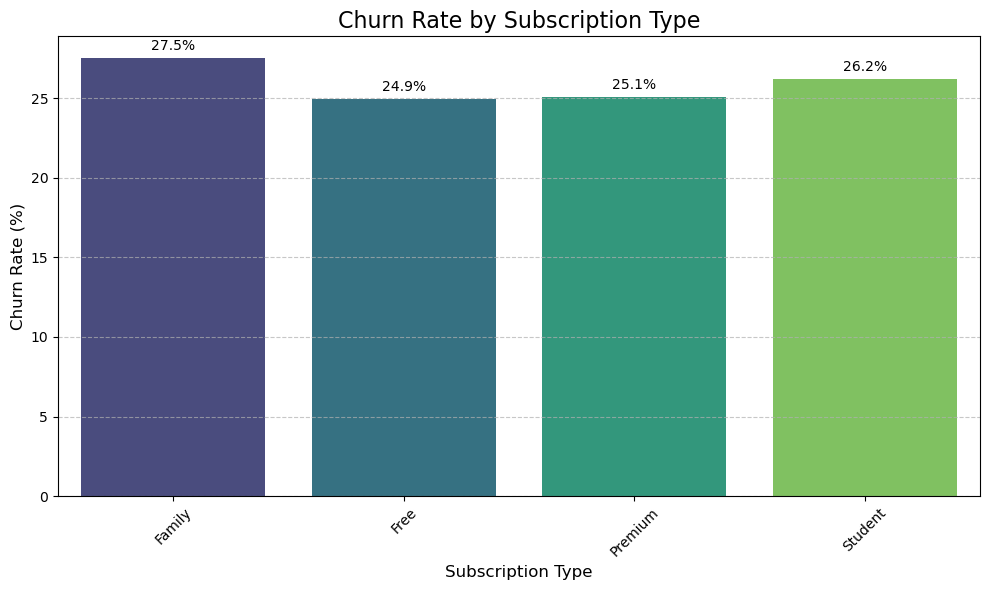

In [33]:
# Calculate churn rate by subscription_type
churn_by_sub = df2.groupby('subscription_type')['is_churned'].mean().reset_index()
churn_by_sub.columns = ['subscription_type', 'churn_rate']
churn_by_sub['churn_rate'] = churn_by_sub['churn_rate'] * 100  # Convert to percentage

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='subscription_type', y='churn_rate', data=churn_by_sub, palette='viridis')

# Add labels and title
plt.title('Churn Rate by Subscription Type', fontsize=16)
plt.xlabel('Subscription Type', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of bars
for i, v in enumerate(churn_by_sub['churn_rate']):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\pagre\AppData\Local\Temp\ipykernel_3024\1139209530.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='device_type', y='avg_listening_time', data=listening_by_device, palette='Blues_d')


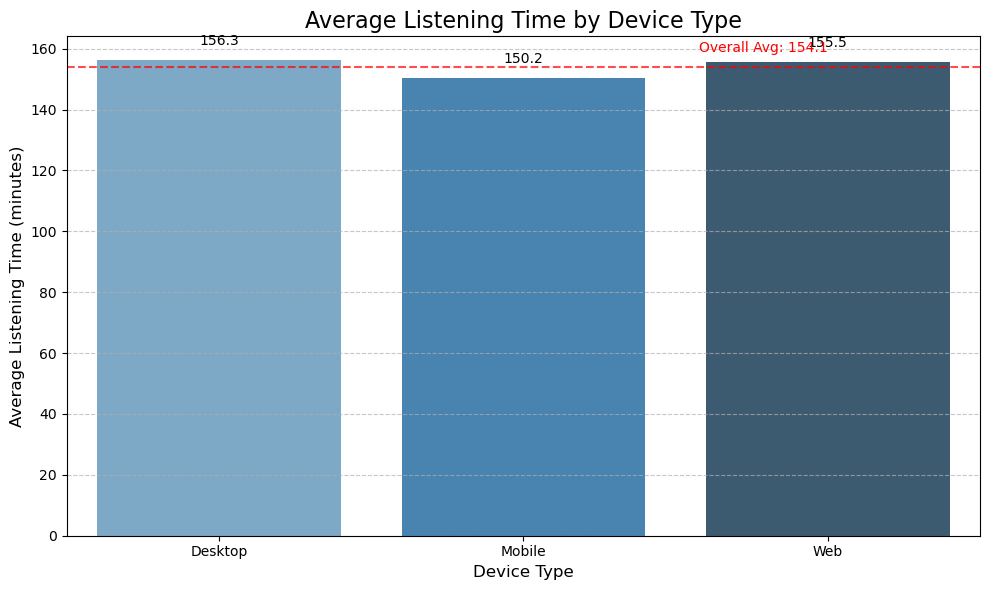

In [35]:
# Calculate average listening time by device type
listening_by_device = df2.groupby('device_type')['listening_time'].mean().reset_index()
listening_by_device.columns = ['device_type', 'avg_listening_time']

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='device_type', y='avg_listening_time', data=listening_by_device, palette='Blues_d')

# Add labels and title
plt.title('Average Listening Time by Device Type', fontsize=16)
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Average Listening Time (minutes)', fontsize=12)
plt.xticks(rotation=45 if len(listening_by_device) > 4 else 0)

# Add value labels on top of bars
for i, v in enumerate(listening_by_device['avg_listening_time']):
    plt.text(i, v + 5, f'{v:.1f}', ha='center', fontsize=10)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line for the overall average
overall_avg = df2['listening_time'].mean()
plt.axhline(y=overall_avg, color='red', linestyle='--', alpha=0.7)
plt.text(len(listening_by_device)-1, overall_avg+5, f'Overall Avg: {overall_avg:.1f}', 
         color='red', ha='right', fontsize=10)

plt.tight_layout()
plt.show()

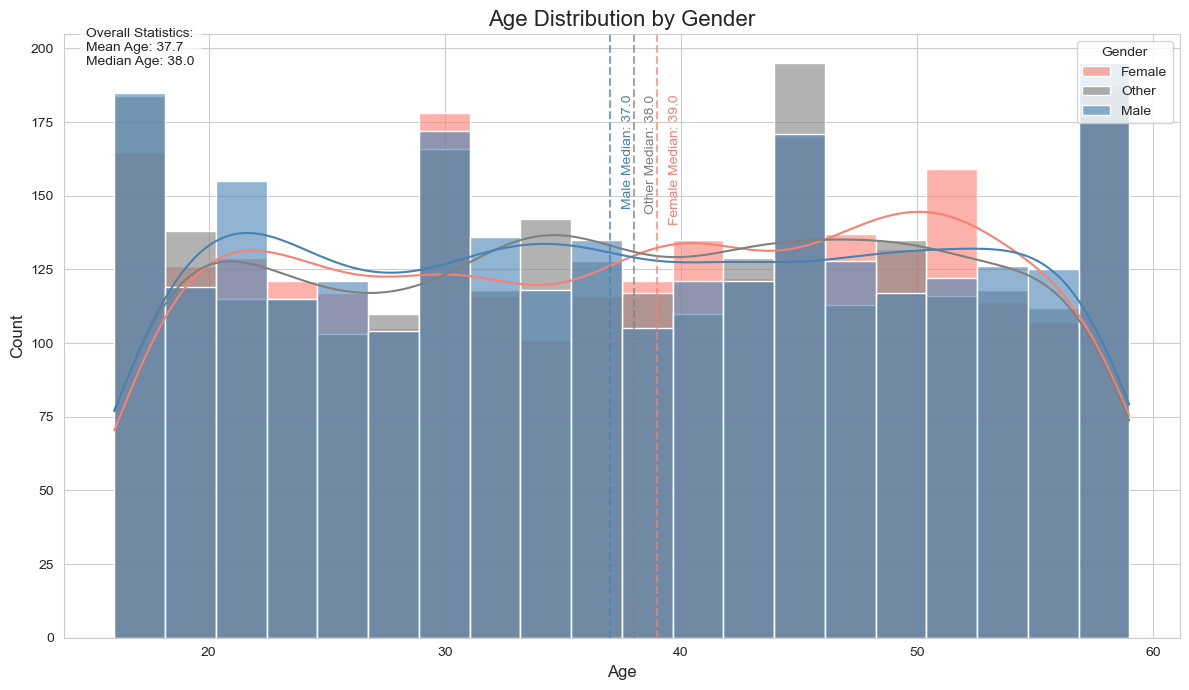

In [37]:
# Set the style for better aesthetics
sns.set_style('whitegrid')

# Create the histogram
plt.figure(figsize=(12, 7))

# Define colors and labels for gender groups
colors = {'Male': 'steelblue', 'Female': 'salmon'}
gender_labels = df2['gender'].unique()

# Create histogram for each gender
for gender in gender_labels:
    subset = df2[df2['gender'] == gender]
    sns.histplot(data=subset, x='age', color=colors.get(gender, 'gray'), 
                 alpha=0.6, label=gender, kde=True, bins=20)

# Add labels and title
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')

# Add vertical lines for median age of each gender
for gender in gender_labels:
    median_age = df2[df2['gender'] == gender]['age'].median()
    plt.axvline(x=median_age, color=colors.get(gender, 'gray'), 
                linestyle='--', alpha=0.7)
    plt.text(median_age+0.5, plt.gca().get_ylim()[1]*0.9, 
             f'{gender} Median: {median_age}', 
             color=colors.get(gender, 'gray'), rotation=90, va='top')

# Add overall age statistics as text
mean_age = df2['age'].mean()
median_age = df2['age'].median()
stats_text = f'Overall Statistics:\nMean Age: {mean_age:.1f}\nMedian Age: {median_age:.1f}'
plt.text(0.02, 0.95, stats_text, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.7), fontsize=10)

plt.tight_layout()
plt.show()

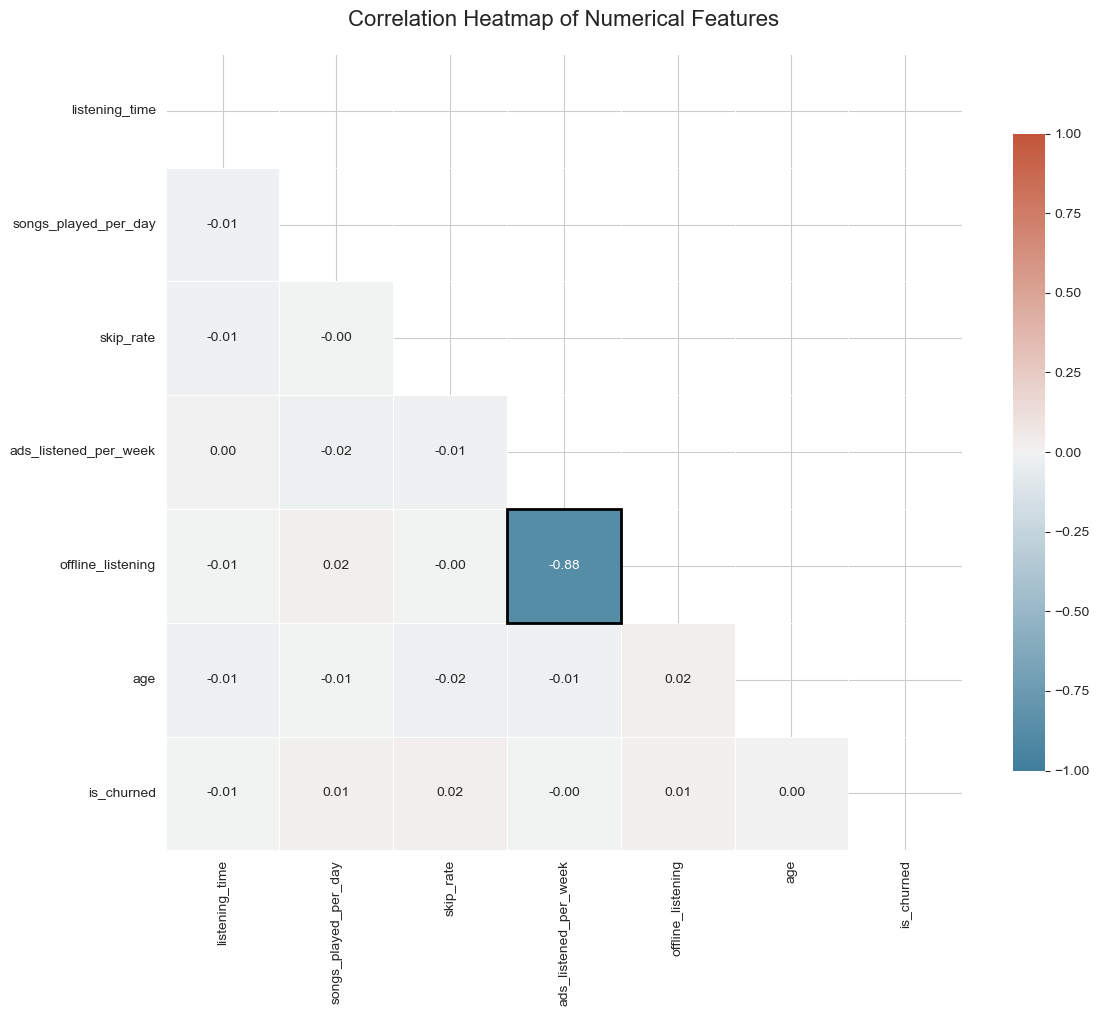

In [38]:
# Select only numerical columns for correlation analysis
numerical_cols = ['listening_time', 'songs_played_per_day', 'skip_rate', 
                 'ads_listened_per_week', 'offline_listening', 'age', 'is_churned']
numeric_df = df2[numerical_cols]

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a mask for the upper triangle to make the heatmap more readable (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot=True, fmt=".2f")

# Add title and adjust layout
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, pad=20)
plt.tight_layout()

# Highlight strong correlations (optional)
threshold = 0.5  # Correlation threshold to highlight
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=2))

plt.show()